<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
# Importation de la librairie Pandas

import pandas as pd

In [ ]:
# Importation de Matplotlib

import matplotlib.pyplot as plt

In [ ]:
# Importation de Seaborn

import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [ ]:
# Importation du fichier population.csv

population = pd.read_csv('population.csv')

In [ ]:
# Importation du fichier dispo_alimentaire.csv

dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

In [ ]:
# Importation du fichier aide_alimentaire.csv

aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

In [ ]:
# Importation du fichier sous_nutrition.csv

sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [ ]:
# Consulter le nombre de colonnes

population.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [ ]:
# La nature des données dans chacune des colonnes

population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [ ]:
# Le nombre de valeurs présentes dans chacune des colonnes

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [ ]:
# Affichage les 5 premières lignes de la table

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [ ]:
# Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
# Multiplication de la colonne valeur par 1000

population['Valeur']*= 1000

In [ ]:
# changement du nom de la colonne Valeur par Population

population = population.rename(columns={'Valeur':'Population'})

In [ ]:
# Affichage les 5 premières lignes de la table pour voir les modifications

population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [ ]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [ ]:
# Consulter le nombre de colonnes

dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [ ]:
# Affichage les 5 premières lignes de la table

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remplacement des NaN dans le dataset par des 0

dispo_alimentaire.fillna(0, inplace=True)

In [ ]:
# Multiplication de toutes les lignes contenant des milliers de tonnes en Kg
# Créer une variable MULTIPLIER pour recenser les colonnes avec des milliers
MULTIPLIER = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']


In [ ]:
# Utilisation de la boucle for

for i in MULTIPLIER:
  dispo_alimentaire[i]*= 1000

In [ ]:
# Affichage les 5 premières lignes de la table

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [ ]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [ ]:
# Consulter le nombre de colonnes

aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [ ]:
# Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
# changement du nom de la colonne Pays bénéficiaire par Zone

aide_alimentaire.rename(columns ={'Pays bénéficiaire':'Zone'},inplace=True)

In [ ]:
# Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aide_alimentaire['Valeur']*= 1000

In [ ]:
# Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [ ]:
# Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [ ]:
# Consulter le nombre de colonnes

sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [ ]:
# Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
# Conversion de la colonne sous nutrition en numérique

sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [ ]:
# Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
# Puis remplacement des NaN en 0

sous_nutrition.fillna(0, inplace=True)

In [ ]:
# changement du nom de la colonne Valeur par sous_nutrition

sous_nutrition.rename(columns={'Valeur':'sous_nutrition'}, inplace=True)

In [ ]:
# Multiplication de la colonne sous_nutrition par 1000000

sous_nutrition['sous_nutrition']*= 1000000

In [ ]:
# Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [ ]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

In [ ]:
# Sélectionner dans le df population, Zone et Population pour l'année 2017

population_2017 = population.loc[population['Année']== 2017, ['Zone', 'Population']]

In [ ]:
# Affichage

population_2017.head()

,Zone,Population
4,Afghanistan,36296113.0
10,Afrique du Sud,57009756.0
16,Albanie,2884169.0
22,Algérie,41389189.0
28,Allemagne,82658409.0


In [ ]:
# Sélectionner dans le df sous_nutrition, Zone et sous_nutrition pour l'année 2017

sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année']== '2016-2018', ['Zone', 'sous_nutrition']]

In [ ]:
# Affichage

sous_nutrition_2017.head()

,Zone,sous_nutrition
4,Afghanistan,10500000.0
10,Afrique du Sud,3100000.0
16,Albanie,100000.0
22,Algérie,1300000.0
28,Allemagne,0.0


In [ ]:
# Jointure entre les 2 tables

JOINTURE2017 = pd.merge(population_2017, sous_nutrition_2017, on = 'Zone')
JOINTURE2017.head()

,Zone,Population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [ ]:
# Personnes en état de sous-nutrition en 2017

Personnes_en_état_de_sous_nutrition = round(JOINTURE2017['sous_nutrition'].sum())
print('Il y a ', Personnes_en_état_de_sous_nutrition,'Personnes en état de sous-nutrition en 2017')

Il y a  535700000 Personnes en état de sous-nutrition en 2017


In [ ]:
# Proportion de personnes en état de sous nutrition en 2017

Proportion_personnes_sous_nourries = round(JOINTURE2017['sous_nutrition'].sum()*100/JOINTURE2017['Population'].sum(), 2)

In [ ]:
# Affichage

print('Proportion de personnes en état de sous nutrition :', Proportion_personnes_sous_nourries,'%')

Proportion de personnes en état de sous nutrition : 7.1 %



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [ ]:
# Combien mange en moyenne un être humain ?


# 2300 Source => FAOSTAT

In [ ]:
# On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

DISPOP = pd.merge(dispo_alimentaire, population_2017, on ='Zone')

In [ ]:
# Affichage du nouveau dataframe

DISPOP.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [ ]:
# Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement/Dispo_kcal

DISPOP['dispo_kcal'] = DISPOP['Disponibilité alimentaire (Kcal/personne/jour)'] * DISPOP['Population']

In [ ]:
# Affichage

print('Disponibilté alimentaire totale :', DISPOP['dispo_kcal'].sum(), "kcal")

Disponibilté alimentaire totale : 20918984627331.0 kcal


In [ ]:
# Calcul du nombre d'humains pouvant être nourris

Nombre_personnes_pouvant_etre_nourries = round(DISPOP['dispo_kcal'].sum()/2300)

In [ ]:
# Affichage

print('Total humains pouvant être nourris :', Nombre_personnes_pouvant_etre_nourries)

Total humains pouvant être nourris : 9095210708


In [ ]:
# Proportion d'etres humains pouvant être nourris

Prop = round(Nombre_personnes_pouvant_etre_nourries*100/population_2017['Population'].sum(),2)

In [ ]:
# Affichage

print('Proportion etres humains pouvant être nourris :', Prop, '%')

Proportion etres humains pouvant être nourris : 120.5 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [ ]:
# Transfert des données avec les végétaux dans un nouveau dataframe

VEGETAUX = DISPOP.loc[DISPOP['Origine']=='vegetale',:]
VEGETAUX.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.0


In [ ]:
# Calcul du nombre de kcal disponible pour les végétaux

KCAL_VEGETAUX = VEGETAUX['dispo_kcal'].sum()
KCAL_VEGETAUX

17260764211501.0

In [ ]:
# Calcul du nombre d'humains pouvant être nourris avec les végétaux

Nombre_humains_nourris_par_les_vegetaux = round(KCAL_VEGETAUX/2300)


In [ ]:
# Affichage

print('Total humains pouvant être nourris avec les produits végétaux :', Nombre_humains_nourris_par_les_vegetaux)

Total humains pouvant être nourris avec les produits végétaux : 7504680092


In [ ]:
# Proportion d'etres humains pouvant être nourris avec les végétaux

Prop_vege = round(Nombre_humains_nourris_par_les_vegetaux*100/population_2017['Population'].sum(),2)

In [ ]:
# Affichage Proportion d'etres humains pouvant être nourris avec les végétaux

print('Proportion de personnes pouvant être nourris par les vegetaux :', Prop_vege, '%')

Proportion de personnes pouvant être nourris par les vegetaux : 99.42 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [ ]:
# Calcul de la disponibilité totale

Disponibilité_intérieure_totale = DISPOP['Disponibilité intérieure'].sum()

Disponibilité_intérieure_totale

9733927000.0

In [ ]:
# création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, Semences, Traitement, Autres Utilisations
# Nouvelle variable avec les colonnes indiquées, puis boucle for

Liste = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']

for i in Liste:
    print('Proportion de', i, ':', round(DISPOP[i].sum()*100/Disponibilité_intérieure_totale,2),'%')

Proportion de Aliments pour animaux : 13.23 %
Proportion de Pertes : 4.65 %
Proportion de Nourriture : 49.37 %
Proportion de Semences : 1.58 %
Proportion de Traitement : 22.45 %
Proportion de Autres Utilisations : 8.82 %


In [ ]:
Liste = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']

In [ ]:
Proportion = [13.23, 4.65, 49.37, 1.58, 22.45, 8.82]

([<matplotlib.patches.Wedge at 0x7dc38a470fd0>,
 [Text(1.006531471264091, 0.4437278415368417, 'Aliments pour animaux'),
  Text(0.6160341123948379, 0.9113188093998196, 'Pertes'),
  Text(-0.9808114954916398, 0.49800482960655434, 'Nourriture'),
  Text(-0.470105752381569, -0.9944850836376377, 'Semences'),
  Text(0.33827669623339995, -1.0466942613702515, 'Traitement'),
  Text(1.0581248691474516, -0.30061896362619644, 'Autres Utilisations')],
 [Text(0.5490171661440496, 0.24203336811100454, '13.22%'),
  Text(0.33601860676082057, 0.497082986945356, '4.65%'),
  Text(-0.5349880884499852, 0.2716389979672114, '49.32%'),
  Text(-0.2564213194808558, -0.5424464092568932, '1.58%'),
  Text(0.1845145615818545, -0.5709241425655917, '22.43%'),
  Text(0.5771590195349736, -0.16397398015974352, '8.81%')])

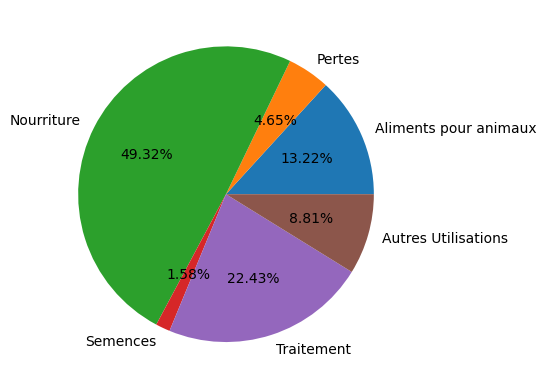

In [ ]:
# Graphique 1

plt.pie(Proportion, labels = Liste, autopct='%1.2f%%')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [ ]:
# Création d'une liste avec toutes les variables des céréales d'après FAOSTAT

liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle",
                  "Avoine", "Millet", "Sorgho", "Soja","Céréales, Autres"]

In [ ]:
# Création d'un dataframe avec les informations uniquement pour ces céréales

cereales = DISPOP.loc[DISPOP['Produit'].isin(liste_cereales),:]
cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0,36296113.0,4.968938e+10
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0,36296113.0,7.622184e+08
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0,36296113.0,1.088883e+08
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,0.79,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0,36296113.0,9.436989e+08


In [ ]:
# Calcul de la proportion d'alimentation animale

Prop_alimentation_animale = round(cereales['Aliments pour animaux'].sum()*100/ Disponibilité_intérieure_totale,2)

In [ ]:
# Affichage de la proportion d'alimentation animale

print("Proportion d'alimentation animale :", Prop_alimentation_animale, '%')

Proportion d'alimentation animale : 9.01 %


In [ ]:
# Calcul de la proportion d'alimentation humaine

Prop_Nourriture = round(cereales['Nourriture'].sum()*100/ Disponibilité_intérieure_totale,2)

In [ ]:
# Affichage de la proportion d'alimentation humaine

print("Proportion d'alimentation humaine :", Prop_Nourriture, '%')

Proportion d'alimentation humaine : 10.59 %


# **3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017**

In [ ]:
# Création de la colonne proportion par pays

JOINTURE2017['Prop_par_pays'] = JOINTURE2017['sous_nutrition']*100/JOINTURE2017['Population']
JOINTURE2017.head()


,Zone,Population,sous_nutrition,Prop_par_pays
0,Afghanistan,36296113.0,10500000.0,28.928718
1,Afrique du Sud,57009756.0,3100000.0,5.437666
2,Albanie,2884169.0,100000.0,3.467203
3,Algérie,41389189.0,1300000.0,3.140917
4,Allemagne,82658409.0,0.0,0.000000


In [ ]:
# Affichage après tri des 10 pires pays

JOINTURE2017.sort_values(by = ['Prop_par_pays'], ascending = False).head(10)

,Zone,Population,sous_nutrition,Prop_par_pays
78,Haïti,10982366.0,5300000.0,48.259182
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.188685
108,Madagascar,25570512.0,10500000.0,41.062924
103,Libéria,4702226.0,1800000.0,38.279742
100,Lesotho,2091534.0,800000.0,38.249438
183,Tchad,15016753.0,5700000.0,37.957606
161,Rwanda,11980961.0,4200000.0,35.055619
121,Mozambique,28649018.0,9400000.0,32.810898
186,Timor-Leste,1243258.0,400000.0,32.173531
0,Afghanistan,36296113.0,10500000.0,28.928718


In [ ]:
# Données graphique

Graphique2 = JOINTURE2017.sort_values(by = ['Prop_par_pays'], ascending = False).head(10)
Graphique2

,Zone,Population,sous_nutrition,Prop_par_pays
78,Haïti,10982366.0,5300000.0,48.259182
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.188685
108,Madagascar,25570512.0,10500000.0,41.062924
103,Libéria,4702226.0,1800000.0,38.279742
100,Lesotho,2091534.0,800000.0,38.249438
183,Tchad,15016753.0,5700000.0,37.957606
161,Rwanda,11980961.0,4200000.0,35.055619
121,Mozambique,28649018.0,9400000.0,32.810898
186,Timor-Leste,1243258.0,400000.0,32.173531
0,Afghanistan,36296113.0,10500000.0,28.928718


Text(0.5, 0, 'Proportion par pays')

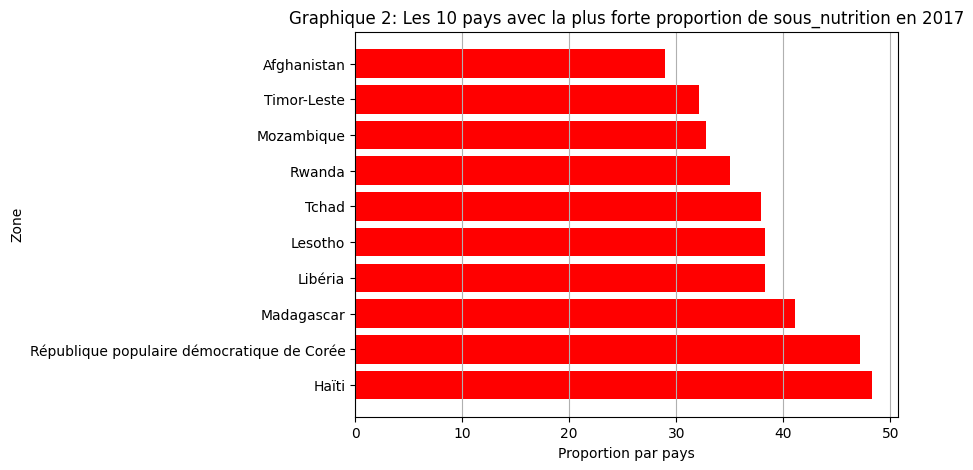

In [ ]:
# Graphique 2

plt.figure(figsize = (7,5))
plt.barh(Graphique2['Zone'], Graphique2['Prop_par_pays'], color = 'red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis='x')
plt.title('Graphique 2: Les 10 pays avec la plus forte proportion de sous_nutrition en 2017')
plt.ylabel('Zone', fontsize = 10)
plt.xlabel('Proportion par pays')



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [ ]:
# Calcul du total de l'aide alimentaire par pays

GROUPAGE_PAR_PAYS = aide_alimentaire.groupby(['Zone'])['Valeur'].sum()
GROUPAGE_PAR_PAYS.head()

Zone
Afghanistan    185452000
Algérie         81114000
Angola           5014000
Bangladesh     348188000
Bhoutan          2666000
Name: Valeur, dtype: int64

In [ ]:
# Affichage après tri des 10 pays qui ont le plus bénéficié de l'aide alimentaire

GROUPAGE_PAR_PAYS.sort_values(ascending = False).head(10)

Zone
République arabe syrienne           1858943000
Éthiopie                            1381294000
Yémen                               1206484000
Soudan du Sud                        695248000
Soudan                               669784000
Kenya                                552836000
Bangladesh                           348188000
Somalie                              292678000
République démocratique du Congo     288502000
Niger                                276344000
Name: Valeur, dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [ ]:
# Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
# Liste des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016

Cinq_pays = ['République arabe syrienne', 'Éthiopie', 'Yémen','Soudan du Sud', 'Soudan']

In [ ]:
# df des 5 pays avec la zone, l'année et l'aide alimentaire

df_Cinq_pays = aide_alimentaire.loc[aide_alimentaire['Zone'].isin(Cinq_pays),['Zone', 'Année', 'Valeur']]
df_Cinq_pays.head()

,Zone,Année,Valeur
354,Éthiopie,2013,170000
355,Éthiopie,2014,466000
356,Éthiopie,2015,244000
357,Éthiopie,2013,181066000
358,Éthiopie,2014,178646000


In [ ]:
# la méthode '.pivot_table' pour avoir un tableau à 2 entrées

PIVOT = df_Cinq_pays.pivot_table(index='Année', columns = 'Zone', values ='Valeur', aggfunc='sum')
PIVOT

Zone,République arabe syrienne,Soudan,Soudan du Sud,Yémen,Éthiopie
Année,,,,,
2013,563566000.0,330230000.0,196330000.0,264764000.0,591404000.0
2014,651870000.0,321904000.0,450610000.0,103840000.0,586624000.0
2015,524949000.0,17650000.0,48308000.0,372306000.0,203266000.0
2016,118558000.0,NaN,NaN,465574000.0,NaN


In [ ]:
# Tableau avec les index

PIVOT = PIVOT.reset_index()
PIVOT

Zone,Année,République arabe syrienne,Soudan,Soudan du Sud,Yémen,Éthiopie
0,2013,563566000.0,330230000.0,196330000.0,264764000.0,591404000.0
1,2014,651870000.0,321904000.0,450610000.0,103840000.0,586624000.0
2,2015,524949000.0,17650000.0,48308000.0,372306000.0,203266000.0
3,2016,118558000.0,NaN,NaN,465574000.0,NaN


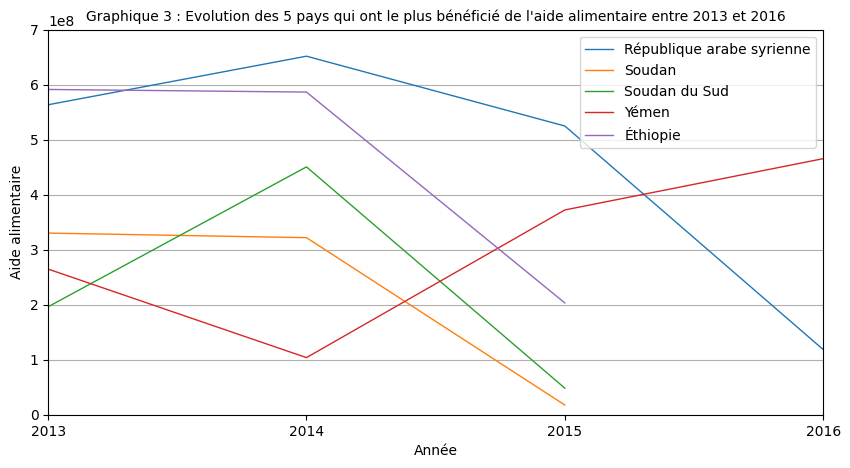

In [ ]:
# Graphique 3

plt.figure(figsize=(10, 5))
plt.plot(PIVOT['Année'], PIVOT['République arabe syrienne'], label='République arabe syrienne', linewidth=1)
plt.plot(PIVOT['Année'], PIVOT['Soudan'], label='Soudan', linewidth=1)
plt.plot(PIVOT['Année'], PIVOT['Soudan du Sud'], label='Soudan du Sud', linewidth=1)
plt.plot(PIVOT['Année'], PIVOT['Yémen'], label='Yémen', linewidth=1)
plt.plot(PIVOT['Année'], PIVOT['Éthiopie'], label='Éthiopie', linewidth=1)
plt.legend(loc='upper right')
plt.xlabel('Année', fontsize= 10)
plt.ylabel('Aide alimentaire', fontsize= 10)
plt.yticks(fontsize=10)
plt.title("Graphique 3 : Evolution des 5 pays qui ont le plus bénéficié de l'aide alimentaire entre 2013 et 2016", fontsize=10)
plt.grid(axis='y')
plt.ylim(0, 700000000)
plt.xlim(2013, 2016)
plt.xticks([2013, 2014, 2015, 2016])
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [ ]:
# Calcul de la disponibilité en kcal par personne par jour par pays

Dispo_par_personne_par_pays = dispo_alimentaire.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
Dispo_par_personne_par_pays.head()

Zone
Afghanistan       2087.0
Afrique du Sud    3020.0
Albanie           3188.0
Algérie           3293.0
Allemagne         3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [ ]:
# Affichage des 10 pays qui ont le moins de dispo alimentaire par personne

dispo_le_moins = Dispo_par_personne_par_pays.sort_values().head(10)
dispo_le_moins

Zone
République centrafricaine                     1879.0
Zambie                                        1924.0
Madagascar                                    2056.0
Afghanistan                                   2087.0
Haïti                                         2089.0
République populaire démocratique de Corée    2093.0
Tchad                                         2109.0
Zimbabwe                                      2113.0
Ouganda                                       2126.0
Timor-Leste                                   2129.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [ ]:
# Tableau avec les index

dispo_le_moins = dispo_le_moins.reset_index()
dispo_le_moins

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


([<matplotlib.axis.XTick at 0x7dc3880ce950>,
 [Text(1600, 0, '1600'),
  Text(1800, 0, '1800'),
  Text(2000, 0, '2000'),
  Text(2200, 0, '2200')])

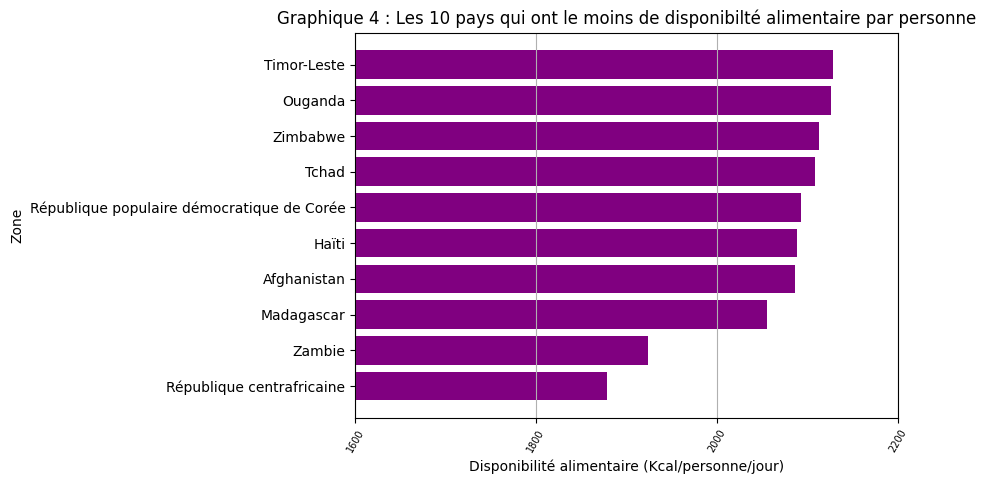

In [ ]:
# Graphique 4

plt.figure(figsize = (7,5))
plt.barh(dispo_le_moins['Zone'], dispo_le_moins['Disponibilité alimentaire (Kcal/personne/jour)'], color ='purple')
plt.xticks(fontsize = 7, rotation = 60)
plt.grid(axis='x')
plt.title('Graphique 4 : Les 10 pays qui ont le moins de disponibilté alimentaire par personne')
plt.ylabel('Zone')
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xlim(1600, 2200)
plt.xticks([1600, 1800, 2000, 2200])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [ ]:
# Affichage des 10 pays qui ont le plus de dispo alimentaire par personne

dispo_le_plus = Dispo_par_personne_par_pays.sort_values(ascending = False).head(10)
dispo_le_plus.head()

Zone
Autriche                 3770.0
Belgique                 3737.0
Turquie                  3708.0
États-Unis d'Amérique    3682.0
Israël                   3610.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [ ]:
# Tableau avec les index

dispo_le_plus = dispo_le_plus.reset_index()
dispo_le_plus

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
5,Irlande,3602.0
6,Italie,3578.0
7,Luxembourg,3540.0
8,Égypte,3518.0
9,Allemagne,3503.0


Text(0.5, 0, 'Disponibilité alimentaire (Kcal/personne/jour)')

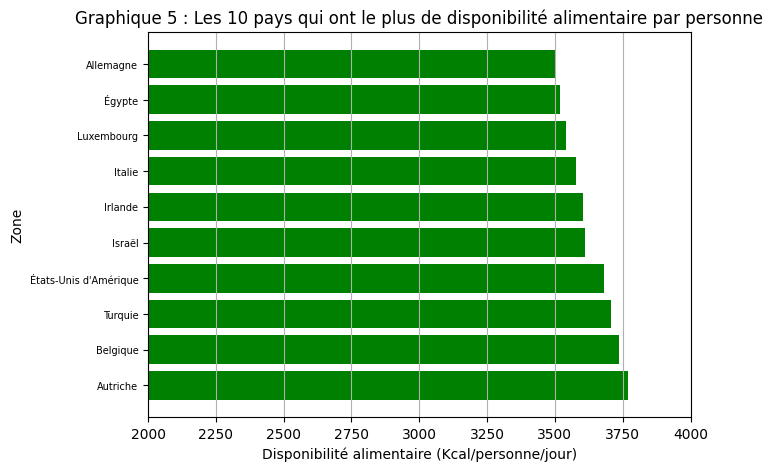

In [ ]:
# Graphique 5

plt.figure(figsize = (7,5))
plt.barh(dispo_le_plus['Zone'], dispo_le_plus['Disponibilité alimentaire (Kcal/personne/jour)'], color ='green')
plt.yticks(fontsize = 7)
plt.grid(axis='x')
plt.title('Graphique 5 : Les 10 pays qui ont le plus de disponibilité alimentaire par personne')
plt.xlim(2000, 4000)
plt.ylabel('Zone')
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [ ]:
# Création d'un dataframe avec uniquement la Thaïlande

THAILAND = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande']
THAILAND.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000.0,5000.0,33000.0,75000.0,0.0,45000.0,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000.0,6000.0,2000.0,6000.0,0.0,12000.0,0.0,2000.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000.0,0.0,0.00,0.00,0.00,358000.0,110000.0,21000.0,0.0,0.0,447000.0,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000.0,7000.0,19000.0,12000.0,0.0,0.0,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000.0,1449000.0,9000.0,671000.0,110000.0,2209000.0,0.0,0.0,13000.0


In [ ]:
# Proportion de la sous nutrition en Thaïlande

JOINTURE2017.loc[JOINTURE2017['Zone'] == 'Thaïlande']

,Zone,Population,sous_nutrition,Prop_par_pays
185,Thaïlande,69209810.0,6200000.0,8.958268


In [ ]:
MANIOC = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc')]
MANIOC

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [ ]:
# Proportion de la production du manioc sur la production totale de la Thailande

round(MANIOC['Production'].sum()*100/THAILAND['Production'].sum(),2)
print('Le manioc représente', round(MANIOC['Production'].sum()*100/THAILAND['Production'].sum(),2), '% de toute la production de la Thailande')


Le manioc représente 14.98 % de toute la production de la Thailande


In [ ]:
# Proportion de manioc pour se nourrir

round(MANIOC['Nourriture']*100/MANIOC['Production'], 2)

print('La Thailande utilise seulement', round(MANIOC['Nourriture'].sum()*100/MANIOC['Production'].sum(), 2), '% de sa production de manioc pour se nourrir')

La Thailande utilise seulement 2.88 % de sa production de manioc pour se nourrir


In [ ]:
# Proportion de manioc exporté

round(MANIOC['Exportations - Quantité']*100/MANIOC['Production'], 2)

print('La Thaïlande exporte ', round(MANIOC['Exportations - Quantité'].sum()*100/MANIOC['Production'].sum(), 2),'% de sa production de manioc')

La Thaïlande exporte  83.41 % de sa production de manioc


In [ ]:
# Répartition de la disponibilité intérieure du manioc
# Boucle for

M = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations']
for i in M:
    print('Proportion de manioc pour ', i, ':', round(MANIOC[i].sum()*100/MANIOC['Disponibilité intérieure'],2),'%')

Proportion de manioc pour  Aliments pour animaux : 13809    28.74
Name: Disponibilité intérieure, dtype: float64 %
Proportion de manioc pour  Pertes : 13809    24.12
Name: Disponibilité intérieure, dtype: float64 %
Proportion de manioc pour  Nourriture : 13809    13.9
Name: Disponibilité intérieure, dtype: float64 %
Proportion de manioc pour  Autres Utilisations : 13809    33.22
Name: Disponibilité intérieure, dtype: float64 %


In [ ]:
# Proportions

P = [28.12, 24.12, 13.90, 33.22]

([<matplotlib.patches.Wedge at 0x7dc38665d660>,
 [Text(0.6931169697462227, 0.8541597428173573, 'Aliments pour animaux'),
  Text(-0.9074047786901331, 0.6217849850312491, 'Pertes'),
  Text(-0.9070112918370207, -0.6223588325718041, 'Nourriture'),
  Text(0.5469853196863346, -0.9543621220729784, 'Autres Utilisations')],
 [Text(0.3780638016797578, 0.465905314264013, '28.30%'),
  Text(-0.4949480611037089, 0.33915544638068135, '24.28%'),
  Text(-0.49473343191110214, -0.339468454130075, '13.99%'),
  Text(0.2983556289198188, -0.5205611574943518, '33.43%')])

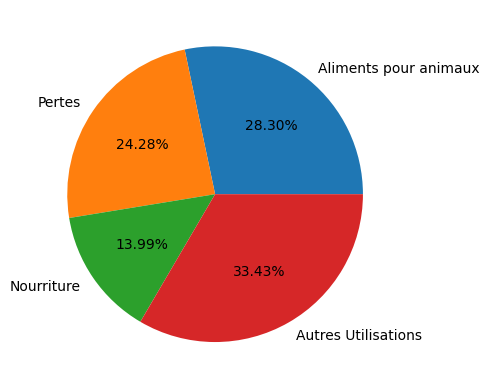

In [ ]:
# Graphique 6 :

plt.pie(P, labels = M, autopct='%1.2f%%')

In [ ]:
# Disponibilté alimentaire par habitant pour la Thailande

THAILAND['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

print('La disponibilté alimentaire par habitatant en Thailande est de', THAILAND['Disponibilité alimentaire (Kcal/personne/jour)'].sum(), 'Kcal/personne/jour')

La disponibilté alimentaire par habitatant en Thailande est de 2785.0 Kcal/personne/jour


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [ ]:
# Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
# "et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être
# le plus en difficulté au niveau alimentaire"
# Que produisent les pays le plus en difficulté alimentaire ?
# Qu'est-ce qu'ils exportent ?

In [ ]:
# Cas de Haiti, pays ayant la plus forte proportion de personnes sous-alimentée en 2017

HAITI =  dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Haïti']
HAITI.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
5913,Haïti,Abats Comestible,animale,1000.0,0.0,4.0,1.46,0.12,0.73,16000.0,0.0,5000.0,15000.0,0.0,11000.0,0.0,0.0,0.0
5914,Haïti,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.41,0.00,0.00,4000.0,0.0,4000.0,4000.0,0.0,0.0,0.0,0.0,0.0
5915,Haïti,"Alcool, non Comestible",vegetale,0.0,1000.0,0.0,0.00,0.00,0.00,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
5916,Haïti,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.07,0.01,0.03,1000.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0
5917,Haïti,Ananas,vegetale,0.0,0.0,1.0,0.59,0.00,0.00,7000.0,0.0,0.0,6000.0,1000.0,7000.0,0.0,0.0,0.0


In [ ]:
# Forte production

Forte_production = HAITI[['Produit', 'Production', 'Exportations - Quantité', 'Importations - Quantité']].sort_values(by = ['Production'], ascending = False)
Forte_production.head()

,Produit,Production,Exportations - Quantité,Importations - Quantité
5989,"Sucre, canne",1200000.0,0.0,0.0
5970,Patates douces,600000.0,0.0,4000.0
5955,Ignames,425000.0,0.0,0.0
5959,Manioc,418000.0,0.0,0.0
5960,Maïs,336000.0,0.0,22000.0


In [ ]:
# Haiti produit plus la canne à sucre
# Que représente cette production ?

In [ ]:
canne_haiti = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Haïti') & (dispo_alimentaire['Produit'] == 'Sucre, canne')]
canne_haiti

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
5989,Haïti,"Sucre, canne",vegetale,275000.0,0.0,3.0,4.36,0.02,0.01,1200000.0,0.0,0.0,45000.0,120000.0,1200000.0,0.0,760000.0,0.0


In [ ]:
# Proportion de la production de canne à sucre sur toute la production de Haiti

print('La canne à sucre représente', round(canne_haiti['Production'].sum()*100/HAITI['Production'].sum(),2), '% de toute la production de Haiti')

La canne à sucre représente 23.66 % de toute la production de Haiti


In [ ]:
# Proportion de Canne à sucre pour se nourrir

print('Haiti consomme seulement', round(canne_haiti['Nourriture'].sum()*100/canne_haiti['Production'].sum(), 2), '% de sa production de sucre de canne')

Haiti consomme seulement 3.75 % de sa production de sucre de canne


In [ ]:
# Proportion de pertes

print('Haiti perd', round(canne_haiti['Pertes'].sum()*100/canne_haiti['Production'].sum(), 2), '% de sa production de sucre de canne')

Haiti perd 10.0 % de sa production de sucre de canne


In [ ]:
 # Exportation élévée

Exportation_élévée = HAITI[['Produit', 'Production', 'Exportations - Quantité', 'Importations - Quantité']].sort_values(by = ['Exportations - Quantité'], ascending = False)
Exportation_élévée.head()

,Produit,Production,Exportations - Quantité,Importations - Quantité
5937,"Fruits, Autres",321000.0,11000.0,6000.0
5936,Feve de Cacao,10000.0,3000.0,0.0
5963,"Mollusques, Autres",1000.0,1000.0,0.0
5970,Patates douces,600000.0,0.0,4000.0
5977,Poissons Pelagiques,0.0,0.0,26000.0


In [ ]:
# Haiti exporte plus les fruits et autres
# Que représente la production des fruits et autres ?

In [ ]:
fruits_haiti = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Haïti') & (dispo_alimentaire['Produit'] == 'Fruits, Autres')]
fruits_haiti

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
5937,Haïti,"Fruits, Autres",vegetale,0.0,0.0,25.0,24.74,0.68,0.24,315000.0,11000.0,6000.0,255000.0,60000.0,321000.0,0.0,0.0,0.0


In [ ]:
# Part des fruits dans toute la production

print('Les fruits et autres représentent', round(fruits_haiti['Production'].sum()*100/HAITI['Production'].sum(),2), '% de toute la production de Haiti')

Les fruits et autres représentent 6.33 % de toute la production de Haiti


In [ ]:
# Proportion de fruits pour se nourrir

print('Haiti consomme', round(fruits_haiti['Nourriture'].sum()*100/fruits_haiti['Production'].sum(), 2), '% de sa production de fruits produits')

Haiti consomme 79.44 % de sa production de fruits produits


In [ ]:
# Proportion d'exportation de fruits


print('Haiti exporte', round(fruits_haiti['Exportations - Quantité'].sum()*100/fruits_haiti['Production'].sum(), 2), '% de sa production de fruits')

Haiti exporte 3.43 % de sa production de fruits


In [ ]:
# Proportion d'importation de fruits


print('Haiti importe', round(fruits_haiti['Importations - Quantité'].sum()*100/fruits_haiti['Production'].sum(), 2), '% de sa production de fruits')

Haiti importe 1.87 % de sa production de fruits


In [ ]:
# Proportion de pertes


print('Haiti perd', round(fruits_haiti['Pertes'].sum()*100/fruits_haiti['Production'].sum(), 2), '% de sa production de fruits')

Haiti perd 18.69 % de sa production de fruits
